# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key= "4f9e88e191c94b8a6c9e0abf97f66399"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [3]:
cities_df = pd.DataFrame({"City": cities})
cities_df.head()

,City
0,saint anthony
1,taolanaro
2,oyama
3,khatanga
4,ushuaia


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#build df for request returns
column_names = ["City","Cloudiness", "Country","Humidity","Lat","Lng",
                "Max Temp", "Wind Speed"]
new_cities_df = pd.DataFrame(columns = column_names)
 
#row count
row_count = 1

#query url        
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url =  f"{url}appid={api_key}&units={units}&q="
print("Beginning Data Retrieval")
# Loop through API for info request
for index, row in cities_df.iterrows():
        
 #JSONify results
    weather_by_city = requests.get(query_url + row["City"]).json()
#weather_by_city.keys()
    
    if weather_by_city["cod"]== "404":
        print("City not found, skipping...") 
    else:
            new_cities_df.set_value(index, "City", weather_by_city["name"])
            new_cities_df.set_value(index, "Country", weather_by_city["sys"]["country"])
            new_cities_df.set_value(index,"Lat", weather_by_city['coord']['lat'])   
            new_cities_df.set_value(index,"Max Temp", weather_by_city["main"]['temp_max'])
            new_cities_df.set_value(index,"Humidity", weather_by_city['main']['humidity'])
            new_cities_df.set_value(index,"Cloudiness", weather_by_city['clouds']['all'])
            new_cities_df.set_value(index,"Wind Speed", weather_by_city['wind']['speed'])
            new_cities_df.set_value(index,"Lng", weather_by_city['coord']["lon"])
            
#Print log
            print("---------------------------------------------")
            print("Processing Record " + str(row_count) +  " of Set "  + str(row_count) + " | " + weather_by_city["name"] )
            print(query_url)
            row_count += 1

Beginning Data Retrieval


/Users/tajmahal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tajmahal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tajmahal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tajmahal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tajmahal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or 

---------------------------------------------
Processing Record 1 of Set 1 | Saint Anthony
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 2 of Set 2 | Oyama
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 3 of Set 3 | Khatanga
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 4 of Set 4 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 5 of Set 5 | Bethel
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
------------------

---------------------------------------------
Processing Record 43 of Set 43 | Poyarkovo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 44 of Set 44 | Salalah
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 45 of Set 45 | Porto Torres
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 46 of Set 46 | Punta Arenas
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 47 of Set 47 | Cabo San Lucas
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------

---------------------------------------------
Processing Record 85 of Set 85 | Sturovo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 86 of Set 86 | Constantine
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
City not found, skipping...
---------------------------------------------
Processing Record 87 of Set 87 | Kapaa
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 88 of Set 88 | Victoria
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 89 of Set 89 | Hilo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&un

City not found, skipping...
---------------------------------------------
Processing Record 127 of Set 127 | Kisaran
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 128 of Set 128 | Taseyevo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 129 of Set 129 | Belmonte
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 130 of Set 130 | Isangel
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 131 of Set 131 | Severo-Kurilsk
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imper

---------------------------------------------
Processing Record 168 of Set 168 | Okhotsk
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 169 of Set 169 | Saskylakh
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 170 of Set 170 | Sitka
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
City not found, skipping...
---------------------------------------------
Processing Record 171 of Set 171 | Bandarbeyla
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 172 of Set 172 | Muros
https://api.openweath

---------------------------------------------
Processing Record 209 of Set 209 | Riyadh
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 210 of Set 210 | Ponta do Sol
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 211 of Set 211 | Aasiaat
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 212 of Set 212 | Sobolevo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 213 of Set 213 | Bonavista
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
-----------------------

---------------------------------------------
Processing Record 251 of Set 251 | Kilifi
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 252 of Set 252 | Penaranda
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 253 of Set 253 | Zhigalovo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 254 of Set 254 | Bambous Virieux
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 255 of Set 255 | Timon
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------

---------------------------------------------
Processing Record 293 of Set 293 | Assiniboia
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 294 of Set 294 | Kununurra
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 295 of Set 295 | Lavrentiya
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 296 of Set 296 | Lata
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 297 of Set 297 | San Javier
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
----------------------

---------------------------------------------
Processing Record 335 of Set 335 | Jaltenango
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 336 of Set 336 | Danielskuil
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 337 of Set 337 | Saint-Pierre
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 338 of Set 338 | Mufumbwe
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 339 of Set 339 | Toowoomba
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units

---------------------------------------------
Processing Record 377 of Set 377 | Belaya Gora
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 378 of Set 378 | Adrar
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 379 of Set 379 | Guanica
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 380 of Set 380 | Villa Carlos Paz
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 381 of Set 381 | Moron
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------

---------------------------------------------
Processing Record 418 of Set 418 | Nisia Floresta
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 419 of Set 419 | Bollnas
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 420 of Set 420 | Sabha
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
City not found, skipping...
---------------------------------------------
Processing Record 421 of Set 421 | Dasoguz
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 422 of Set 422 | Norsup
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q

City not found, skipping...
---------------------------------------------
Processing Record 460 of Set 460 | Orsha
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 461 of Set 461 | Huarmey
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 462 of Set 462 | Mahibadhoo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 463 of Set 463 | Livingston
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 464 of Set 464 | Bangkalan
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial

---------------------------------------------
Processing Record 501 of Set 501 | Witbank
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 502 of Set 502 | Djibo
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 503 of Set 503 | Abu Zabad
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 504 of Set 504 | Aksha
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
---------------------------------------------
Processing Record 505 of Set 505 | Barbate
https://api.openweathermap.org/data/2.5/weather?appid=4f9e88e191c94b8a6c9e0abf97f66399&units=Imperial&q=
--------------------------------

In [5]:
weather_by_city

{'coord': {'lon': 60.69, 'lat': 27.21},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 38.87,
  'pressure': 935.73,
  'humidity': 84,
  'temp_min': 38.87,
  'temp_max': 38.87,
  'sea_level': 1034.11,
  'grnd_level': 935.73},
 'wind': {'speed': 1.7, 'deg': 216.52},
 'clouds': {'all': 0},
 'dt': 1543369688,
 'sys': {'message': 0.0038,
  'country': 'IR',
  'sunrise': 1543372031,
  'sunset': 1543410175},
 'id': 1160939,
 'name': 'Iranshahr',
 'cod': 200}

In [6]:
new_cities_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,90,US,51,43.97,-111.68,35.96,8.52
2,Oyama,20,JP,87,36.31,139.8,57.2,3.36
3,Khatanga,56,RU,38,71.98,102.47,-24.72,3.15
4,Ushuaia,20,AR,61,-54.81,-68.31,48.2,19.46
5,Bethel,90,US,92,60.79,-161.76,26.06,13.87


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
new_cities_df.to_csv("Weather_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

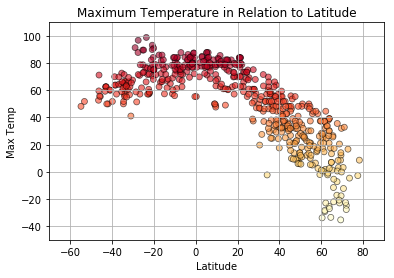

In [8]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Max Temp"], c=new_cities_df["Max Temp"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='YlOrRd', alpha=0.6, label="City")

# Incorporate the other graph properties
plt.title(f"Maximum Temperature in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim([-70, 90])
plt.ylim([-50, 110])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

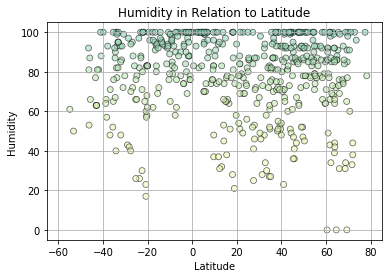

In [9]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Humidity"], c=new_cities_df["Humidity"],
            edgecolor="black", linewidths=.75, marker="o", 
            cmap='YlGnBu', alpha=0.6, label="City")

#graph properties
plt.title(f"Humidity in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim([-65, 85])
plt.ylim([-5, 105])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

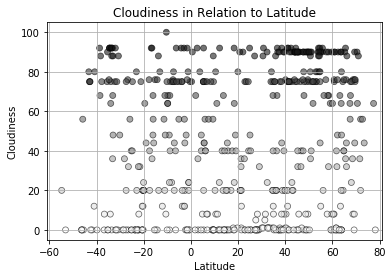

In [10]:
plt.scatter(new_cities_df["Lat"],new_cities_df["Cloudiness"], c=new_cities_df["Cloudiness"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='binary', alpha=0.6, label="City")

#graph properties
plt.title(f"Cloudiness in Relation to Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim([-61, 81])
plt.ylim([-5, 105])
plt.grid(True)

# Save plot as png
plt.savefig("Latitude_v_Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

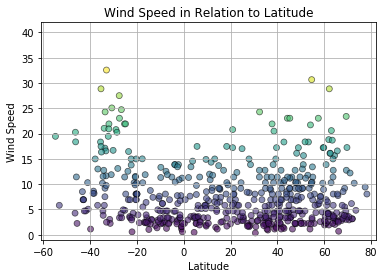

In [11]:
plt.scatter(new_cities_df["Lat"], 
            new_cities_df["Wind Speed"], c=new_cities_df["Wind Speed"],
            edgecolor="black", linewidths=0.75, marker="o", 
            cmap='viridis', alpha=0.6, label="City")

# Incorporate the other graph properties
plt.title(f"Wind Speed in Relation to Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-61, 82])
plt.ylim([-1, 42])

# Save the figure
plt.savefig("Latitude_v_Wind_Speed.png")

# Show plot
plt.show()